In [147]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [148]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(io.BytesIO(requests.get(URL).content), sep=",", encoding="unicode_escape")

In [149]:
data = data[["Rented Bike Count", "Rainfall(mm)", "Seasons"]].to_numpy()
data[data[:, 2] == "Winter", 2] = 0
data[data[:, 2] == "Autumn", 2] = 0
data[data[:, 2] == "Spring", 2] = 1
data[data[:, 2] == "Summer", 2] = 1
data = data.astype(np.float64)
data = data[data[:, 1] > 0]

In [150]:
desmat = np.hstack((data[:, 1:], np.ones((data.shape[0], 1))))
beta = np.linalg.lstsq(desmat, data[:, 0], rcond=None)[0]

In [151]:
pred = desmat @ beta
rsq = np.corrcoef(pred, data[:, 0])[0, 1]**2

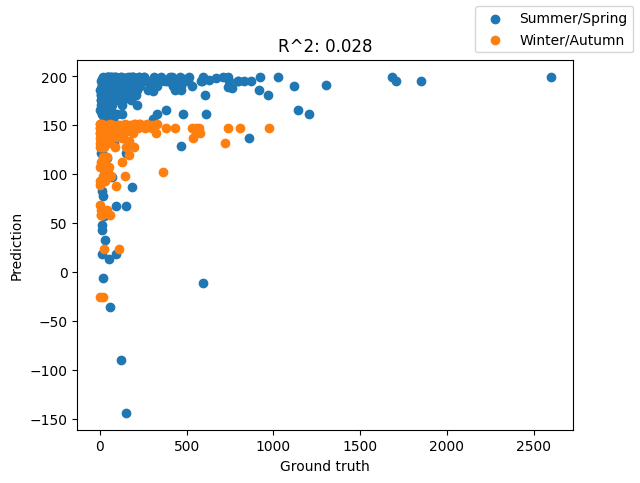

In [152]:
fig, ax = plt.subplots()
ax.set_title(f"R^2: {rsq:.3f}")
ax.set_xlabel("Ground truth")
ax.set_ylabel("Prediction")
data[:, 2] > 0
ax.scatter(data[data[:, 2] > 0, 0], pred[data[:, 2] > 0], label="Summer/Spring")
ax.scatter(data[data[:, 2] < 1, 0], pred[data[:, 2] < 1], label="Winter/Autumn")
fig.legend()
plt.show()